### Importing Libraries

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Importing Data

In [161]:
df = pd.read_csv("D:/Project/bank.csv",sep=';')

In [162]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [163]:
df.shape

(4521, 17)

In [164]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [165]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Printing unique values of the categorical variables

In [166]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())
print(df['y'].unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


### Checking if there are null values or not

In [167]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As the dataset contains no null value, we can say the data is completely cleaned

In [169]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [170]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [171]:
final_dataset=df[['job','marital','education','default','balance','housing','loan','duration','y']]

### Concerting the categorical variables into numerical and avoiding Dummy Variable Trap

In [172]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [173]:
final_dataset.head()

,balance,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,1787,79,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4789,220,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
2,1350,185,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1476,199,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,0,226,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


### Visualising the Heat Map

<AxesSubplot:>

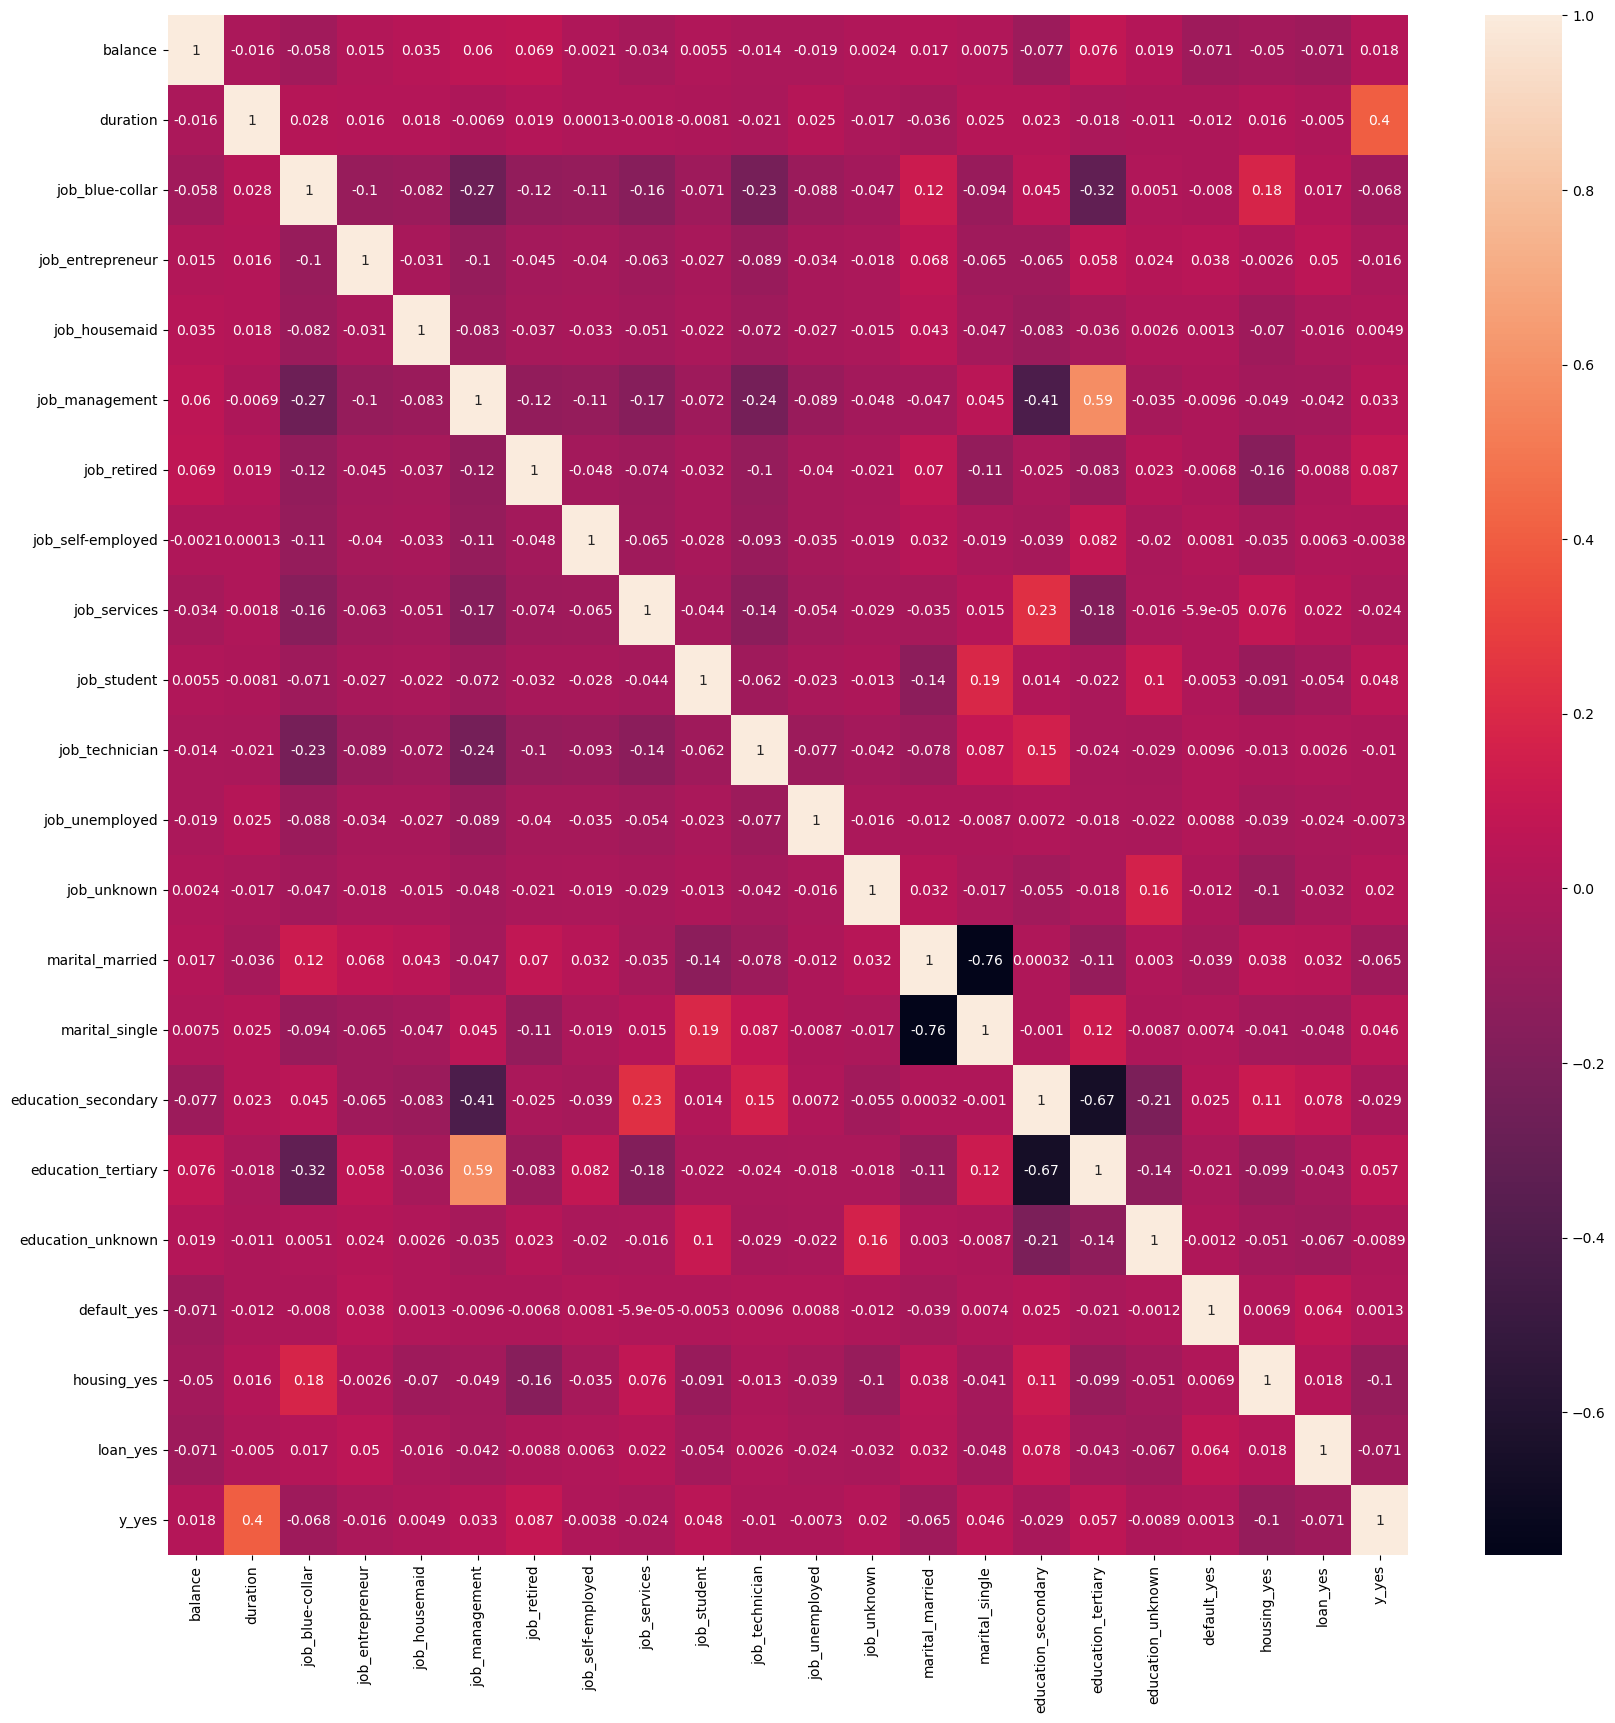

In [174]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(),annot= True)

In [175]:
final_dataset.head()

,balance,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,1787,79,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4789,220,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
2,1350,185,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1476,199,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,0,226,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


### Splitting the dataset into Dependent and Independent Variables

In [176]:
X=final_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y=final_dataset.iloc[:,21].values

In [177]:
X.head()

,balance,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,1787,79,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4789,220,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,1
2,1350,185,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,1476,199,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
4,0,226,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [178]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Splitting the dataset into Traning and Testing Data

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Train and evaluate the Logistic Regression classifier

In [192]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

precision_lr = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision_lr:.4f}")

recall_lr = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall_lr:.4f}")

f1_lr = f1_score(y_test, y_pred_lr)
print(f"F1-score: {f1_lr:.4f}")

auc_roc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"AUC-ROC: {auc_roc_lr:.4f}")

Accuracy: 0.8961
Precision: 0.5526
Recall: 0.2143
F1-score: 0.3088
AUC-ROC: 0.5966


### Train and evaluate the Random Forest classifier

In [193]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

precision_rf = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision_rf:.4f}")

recall_rf = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall_rf:.4f}")

f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-score: {f1_rf:.4f}")

auc_roc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC: {auc_roc_rf:.4f}")

Accuracy: 0.8851
Precision: 0.4400
Recall: 0.2245
F1-score: 0.2973
AUC-ROC: 0.5949


### Train and evaluate the KNN classifier

In [196]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precision: {precision_knn:.4f}")

recall_knn = recall_score(y_test, y_pred_knn)
print(f"Recall: {recall_knn:.4f}")

f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-score: {f1_knn:.4f}")

auc_roc_knn = roc_auc_score(y_test, y_pred_knn)
print(f"AUC-ROC: {auc_roc_knn:.4f}")

Accuracy: 0.8762
Precision: 0.3600
Recall: 0.1837
F1-score: 0.2432
AUC-ROC: 0.5720


C:\Users\spand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train and evaluate the SVM classifier

In [197]:
clf_svm = svm.SVC(kernel='linear', C=1, random_state=0)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

precision_svm = precision_score(y_test, y_pred_svm)
print(f"Precision: {precision_svm:.4f}")

recall_svm = recall_score(y_test, y_pred_svm)
print(f"Recall: {recall_svm:.4f}")

f1_svm = f1_score(y_test, y_pred_lr)
print(f"F1-score: {f1_svm:.4f}")

auc_roc_svm = roc_auc_score(y_test, y_pred_svm)
print(f"AUC-ROC: {auc_roc_svm:.4f}")

Accuracy: 0.8807
Precision: 0.4000
Recall: 0.2041
F1-score: 0.3088
AUC-ROC: 0.5835


In [200]:
data = {'Logistic Regression': [accuracy_lr, precision_lr,recall_lr, f1_lr,auc_roc_lr],
        'Random Forest': [accuracy_rf, precision_rf,recall_rf, f1_rf,auc_roc_rf],
        'KNN': [accuracy_knn, precision_knn,recall_knn, f1_knn,auc_roc_knn],
        'SVM': [accuracy_svm, precision_svm,recall_svm, f1_svm,auc_roc_svm]}
df = pd.DataFrame(data)
new_index = ['Accuracy', 'Precision', 'Recall', 'F1-score','AUC-ROC']
df.index = new_index
print(df)

           Logistic Regression  Random Forest       KNN       SVM
Accuracy              0.896133       0.885083  0.876243  0.880663
Precision             0.552632       0.440000  0.360000  0.400000
Recall                0.214286       0.224490  0.183673  0.204082
F1-score              0.308824       0.297297  0.243243  0.308824
AUC-ROC               0.596610       0.594897  0.572010  0.583453


Here, we can see that Logistic Regression Classifier has the highest scores among these models.
Hence, we can use Logistic Regression to if the client will subscribe a term deposit or not.